# Digital Image Processing - Problem Set 1

## Student Names: Daniela Charris Stand & Germán Monsalve Luna

### Instructions

This first Problem Set covers the topics of basic image manipulation, spatial resolution and intensity level resolution. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!



<h3>Metodología utilizada: </h3> Inicialmente se importan las librerías que permiten la ejecución de los algoritmos y funciones desarrolladas en todos los incisos. Luego se enuncian los problemas y su respectiva solución con diferentes imágenes de prueba. Además se agrega una descripción de las funciones utilizadas y resultados obtenidos.

In [4]:
#Librerías
import numpy as np #Para trabajar vectores y matrices
import cv2 #OpenCV
from matplotlib import pyplot as plt #Para graficar las imágenes.
import os #Para trabajar con las funcionalidades del sistema operativo (Crear archivos, etc.)
%matplotlib inline 

<b>1. </b>Load image from a file and display the image. Determine the size of the image. Finally, save a new copy of the image in a new file.<br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/cameraman.png" height="200" width="200">

## Solution:

En el caso de imágenes en escala de grises.

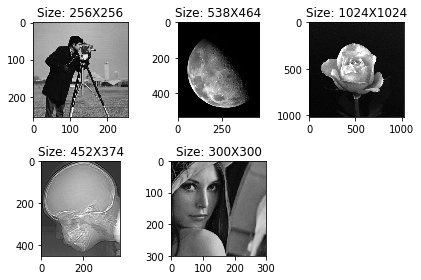

In [9]:
i=1
for filename in os.listdir('Images_G/'):
    #Obtener imágenes.
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_COLOR)
    #Graficar imágenes.
    if img is not None:
        size=img.shape #Obtener tamaño de la imagen.
        plot=plt.subplot(2,3,i) #Realizar subgráficas.
        plot.set_title("Size: %sX%s" % (size[0],size[1]))#Títulos para las imágenes.
        plt.imshow(img)
        i=i+1
        #Guardar una copia de cada imagen.
        cv2.imwrite('Copies/CopyOf%s' % filename,img)
plt.tight_layout()
plt.show() #Mostrar gráfico construido.


<b> Descripción de la solución: </b>

De la librería OS, se utilizó la función LISTDIR() para obtener los nombres de todas las imágenes contenidas en la carpeta especificada, las cuales se querían analizar. En un ciclo FOR, se utilizaron las funciones de la librería OPENCV, como la funcion IMREAD(), la cual lee una imagen cualquiera y recibe dos parámetros: la ruta donde se encuentra la imagen y una bandera que indica la forma en la que debe ser leída la imagen. En este caso, la imagen es leída en escala de grises, por lo que se especificó la bandera IMREAD_GRAYSCALE. Luego, se muestra la imagen creando una figura nueva y utilizando la función IMSHOW a la cual se le ingresa como parámetro la imagen que se va a mostrar. Para determinar el tamaño de la imagen se utilizó una de las propiedades de operación con imagenes de la librería de OPENCV. La propiedad usada es ".shape" la cual devuelve un vector conformada por el número de filas, columnas y canales de una imagen. Teniendo en cuenta que solo se desea el alto y ancho de cada imagen, se tomarán entonces los dos primeros elementos del vector (size[0], size[1]).
Finalmente, para realizar una copia de cada imagen y guardarlas en un directorio, se utilizó el la función IMWRITE() de la librería de OPENCV y recibe dos argumentos: la ruta donde se va a guardar cada imagen y el nombre que se le pondrá a cada imagen en el directorio especificado.

En el caso de imágenes a color.

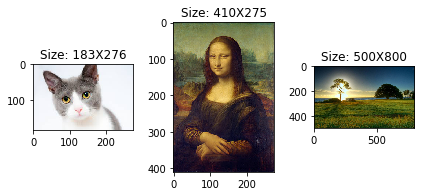

In [11]:
i=1
for filename in os.listdir('Images_C/'):
    #Obtener imágenes.
    img = cv2.cvtColor(cv2.imread(os.path.join('Images_C/',filename),cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    #Graficar imágenes.
    if img is not None:
        size=img.shape
        plot=plt.subplot(1,3,i)
        plot.set_title("Size: %sX%s" % (size[0],size[1]))
        plt.imshow(img)
        i=i+1
        #Saving a copy of every image
        cv2.imwrite('Copies/CopyOf%s' % filename,cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.tight_layout()
plt.show()


<b> Descripción de la solución: </b>

Se utilizó el mismo algoritmo para las imágenes en escala de grises, sin embargo, en la función IMREAD se especificó la bandera IMREAD_COLOR debido a que se deseaba experimentar con imágenes a color. A pesar de que se obtiene la imagen, la función IMREAD utiliza el formato BGR, mientras que la función IMSHOW utiliza el formato RGB, por lo que es necesario realizar la conversión de BGR a RGB con el método de OPENCV CVTCOLOR(). A pesar de que solo se desea el alto y ancho de cada imagen, la imagen se encuentra representada en 3 canales. Para realizar la copia de la imagen fue necesario realizar nuevamente la conversión de RGB a BGR.

<b>2. </b>Write a function <code>flip_image</code>, which flips an image either vertically or horizontally. The function should take two input parameters: the matrix storing the image data and a flag to indicate whether the image should be flipped vertically or horizontally. Use this function to flip an example image both vertically and horizontally. <b>Tip:</b> You can use numpy array indexing or OpenCV's <a href="http://docs.opencv.org/modules/core/doc/operations_on_arrays.html#flip">flip</a> function to solve this problem. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/Woman.bmp" height="200" width="200">

## Solution:

En el caso de imágenes en escala de grises.

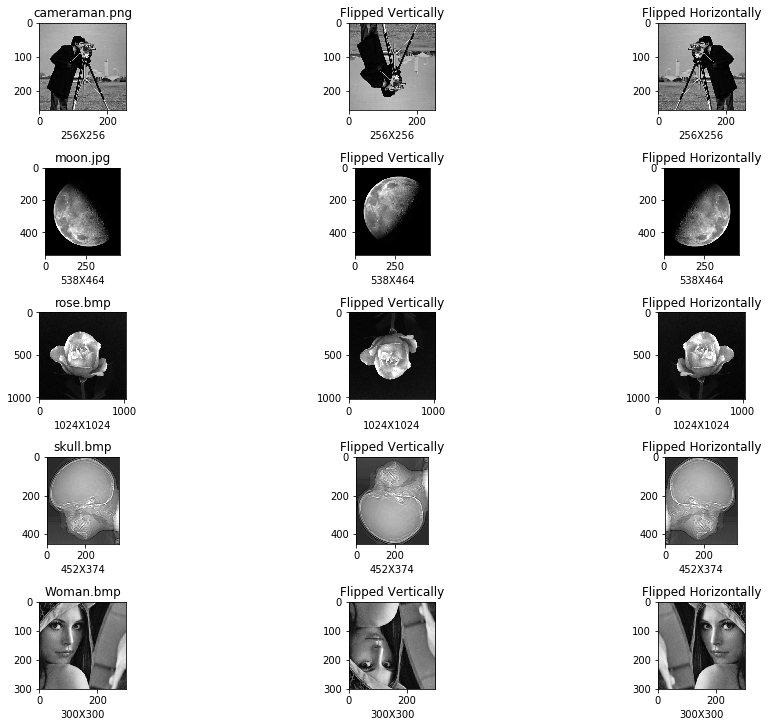

In [15]:
#Definir función flip_image.
def flip_image(Image,Direction):
    if Direction=='Horizontally':
        flipImage=cv2.flip(Image,1)
    if Direction=='Vertically':
        flipImage=cv2.flip(Image,0)
    return flipImage   
#Probar la función construida con múltiples imágenes.
i=1
plt.figure(figsize=(12*1.2,8.5*1.2));
for filename in os.listdir('Images_G/'):
    #Obtener imágenes.
    img = cv2.imread(os.path.join('Images_G',filename),cv2.IMREAD_GRAYSCALE)
    imgflip=np.zeros(img.shape)
    #Graficar imágenes volteadas.
    if img is not None:
        plot=plt.subplot(5,3,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img,cmap='gray')
        i=i+1
        imgflip=flip_image(img,'Vertically')
        plot=plt.subplot(5,3,i)
        plot.set_title('Flipped Vertically')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(imgflip,cmap='gray')
        i=i+1
        imgflip=flip_image(img,'Horizontally')
        plot=plt.subplot(5,3,i)
        plot.set_title('Flipped Horizontally')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(imgflip,cmap='gray')
        i=i+1

plt.tight_layout()
plt.show()


En caso de imágenes a color.

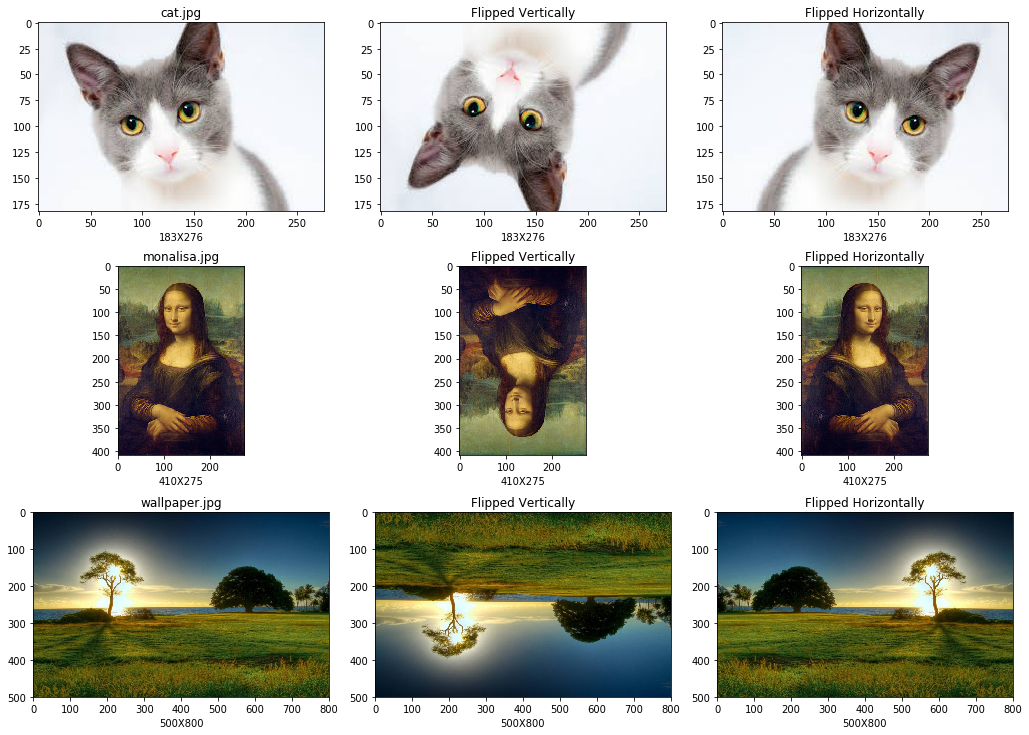

In [18]:
#Probar la función construida con múltiples imágenes.
i=1
plt.figure(figsize=(12*1.2,8.5*1.2));
for filename in os.listdir('Images_C/'):
    #Obtener imágenes.
    img = cv2.cvtColor(cv2.imread(os.path.join('Images_C/',filename),cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    imgflip=np.zeros(img.shape)
    #Graficar imágenes volteadas.
    if img is not None:
        plot=plt.subplot(3,3,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img)
        i=i+1
        imgflip=flip_image(img,'Vertically')
        plot=plt.subplot(3,3,i)
        plot.set_title('Flipped Vertically')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(imgflip)
        i=i+1
        imgflip=flip_image(img,'Horizontally')
        plot=plt.subplot(3,3,i)
        plot.set_title('Flipped Horizontally')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(imgflip)
        i=i+1

plt.tight_layout()
plt.show()

<h3> Descripción de la solución:</h3>
<p style="text-align:justify">
Para este inciso se utilizó la misma función definida para imágenes en escala de grises. A pesar de que las imágenes en escala de grises, utilizan un solo canal y las imágenes a color utilizan 3 canales, la función es indistinta de ésta característica y realiza la rotación correspondiente. </p> 

<b>3. </b> Write a function to generate the negative of an image. This means that  a new image is created in which the pixel values are all equal to 1.0 minus the pixel value in the original image. <br /> <br />

<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/moon.jpg" height="200" width=200>

## Solution:

En el caso de imágenes en escala de grises.

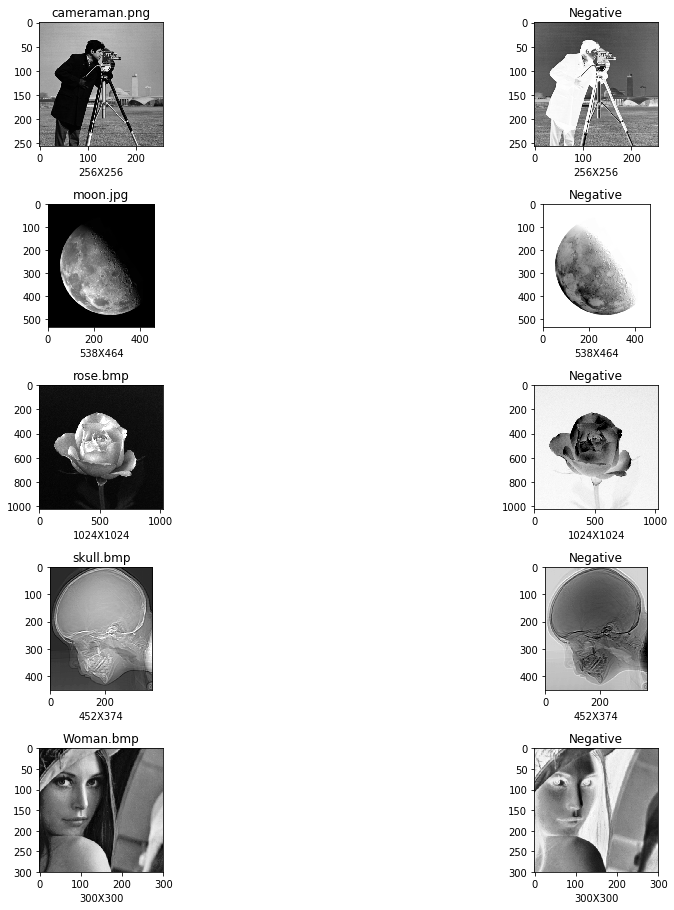

In [17]:
#Definir función Neg_image(img).
def Neg_image(Image):    
    Image=255-Image
    return Image
#Probar solución con distintas imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_G/'):
    #Obtener imágenes
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_GRAYSCALE)
    NegImg=np.zeros(img.shape)
    #Graficar imágenes y su negativo.
    if img is not None:
        plot=plt.subplot(5,2,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img,cmap='gray')
        i=i+1
        NegImg=Neg_image(img)
        plot=plt.subplot(5,2,i)
        plot.set_title('Negative')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(NegImg,cmap='gray')
        i=i+1

plt.tight_layout()
plt.show()
        

<h3>Descripción de la función Neg_image:</h3>
<p style="text-align:justify">
La función implementada recibe como parámetro de entrada la imagen fuente que se va a procesar y tiene como salida la imagen procesada. La acción a ejecutar es a cada uno de los pixeles de la imagen asignarle un nuevo valor correspondiente a 255 menos el valor del pixel.</p>
<h3>Descripción de la solución:</h3>
<p style="text-align:justify">
A pesar de que OPENCV contiene la función BITWISE_NOT(), la cual invierte cada bit de un arreglo, se realizó el cálculo del negativo de manera manual. Luego se utilizan las funciones para cargar y mostrar una imagen que ya se han mencionado anteriormente. </p> 

Para imágenes a color.

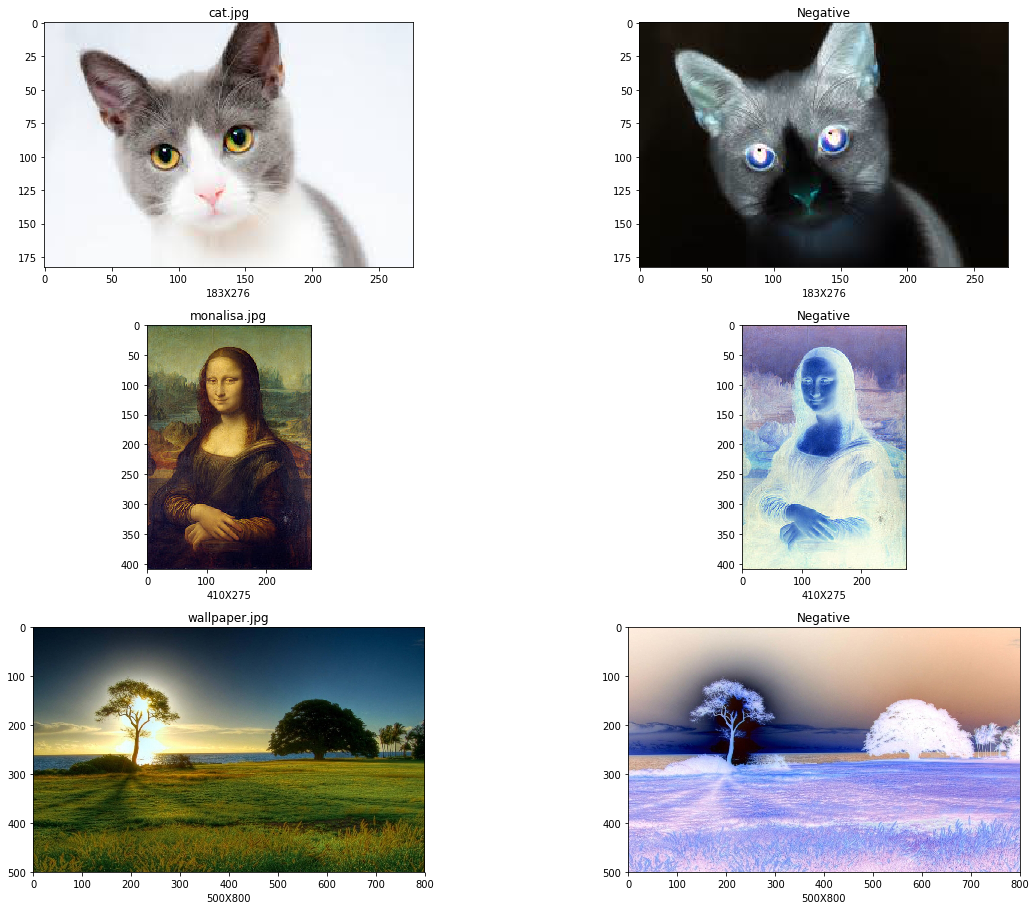

In [20]:
#Probar solución con distintas imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_C/'):
    #Obtener imágenes
    img = cv2.cvtColor(cv2.imread(os.path.join('Images_C/',filename),cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    NegImg=np.zeros(img.shape)
    #Graficar imágenes y su negativo.
    if img is not None:
        plot=plt.subplot(3,2,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img)
        i=i+1
        NegImg=Neg_image(img)
        plot=plt.subplot(3,2,i)
        plot.set_title('Negative')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(NegImg)
        i=i+1

plt.tight_layout()
plt.show()
        

<h3> Descripción de la solución:</h3>
<p style="text-align:justify">
Para este inciso se utilizó la misma función definida para imágenes en escala de grises. A pesar de que las imágenes en escala de grises, utilizan un solo canal y las imágenes a color utilizan 3 canales, la función es indistinta de ésta característica y realiza el negativo de cada uno de los canales. </p> 

<b>4. </b>Write a function <code>average_intensity</code>, which calculates the average intensity level of an image. Use this function on example images and discuss your results. You can use images from section 2 and 3 <br /> <br />

## Solution:

En el caso de imágenes en escala de grises.

In [78]:
#Definir la función average_intensity
def average_intensity( Image ):  
    #Usar la función de numpy
    Average=np.average(Image)
    return Average
#Probar la función.
for filename in os.listdir('Images_G/'):
    #Obtener imágenes.
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
        Average=average_intensity(img)
        print('Average intensity level of',filename,'=',Average)

Average intensity level of cameraman.png = 118.724487305
Average intensity level of moon.jpg = 42.6058197667
Average intensity level of rose.bmp = 46.7893533707
Average intensity level of skull.bmp = 129.390096304
Average intensity level of Woman.bmp = 93.2467


<h3>Descripción de la función average_intensity:</h3>
<p style="text-align:justify">
La función average_intensity desarrollada en este inciso recibe una imagen y retorna el nivel de intensidad promedio de la imagen cargada.</p>
<h3>Descripción de la solución:</h3>
<p style="text-align:justify">
Con el fin de desarrollar este inciso fue necesario utilizar la función “.average” de la librería numpy la cual obtiene el valor promedio de un arreglo/matriz que en este caso corresponde al nivel de intensidad promedio de una imagen. </p> 

<b>En el caso de imágenes a color.</b>

A diferencia de los incisos anteriores, donde fue posible replicar las funciones realizadas para imágenes a color, en este inciso, los valores arrojados por la función average_intensity no eran los correspondientes a la intensidad promedio de la imagen. En una imagen en escala de grises, como contiene un solo canal, el valor promedio arrojado por la función .AVERAGE() de NUMPY corresponde al promedio de los valores de los pixeles, sin embargo, en una imagen a color con 3 canales, la función ejecuta el valor promedio de los tres canales tal como si fuera un arreglo plano.

<b>5. </b>Write a function <code>threshold_image</code> which thresholds an image based on a threshold level given as a parameter to the function. The function should take two parameters: the image to be thresholded and the threshold level. The result of the function should be a new thresholded image. <br /> <br />

## Solution:

En el caso de imágenes en escala de grises.

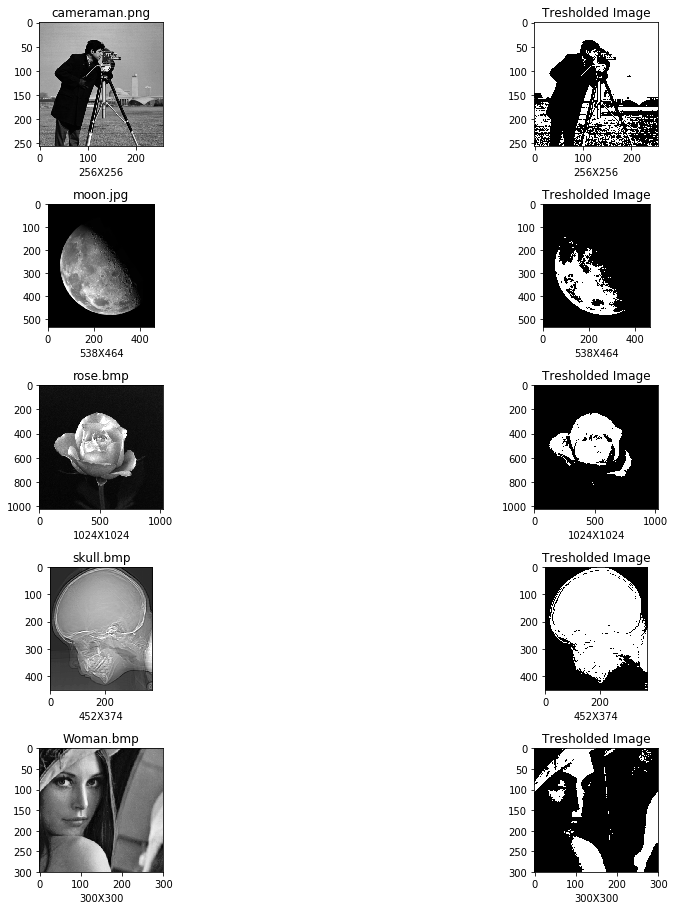

In [57]:
#Definir la función threshold_image.
def threshold_image(Image ,threshold):
    retval,img=cv2.threshold(Image,threshold,255,cv2.THRESH_BINARY ) 
    return img    

#Probar la función threshold_image Function con diferentes imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_G/'):
    #Obtener imágenes
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_GRAYSCALE)
    thrimg=np.zeros(img.shape)
    #Graficar imagenes con threshold.
    if img is not None:
        plot=plt.subplot(5,2,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img,cmap='gray')
        i=i+1
        thrimg=threshold_image(img,128)
        plot=plt.subplot(5,2,i)
        plot.set_title('Tresholded Image')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(thrimg,cmap='gray')
        i=i+1
plt.tight_layout()
plt.show()

<h3>Descripción de la función threshold_image:</h3>
<p style="text-align:justify">
La función threshold_image desarrollada en este inciso recibe dos parámetros: La imagen que se va a procesar y un valor, el cual corresponde en este caso al valor de threshold de cada pixel. Utilizando la función THRESHOLD() de OPENCV, la cual retorna una nueva imagen donde el valor mínimo de cada pixel corresponde a un valor mayor o igual al de threshold. Esto sucede pues para cada valor de pixel de la imagen procesada se evalua si este valor es menor a la variable threshold ingresada a la función y en caso de resultar esto verdadero se cambia el valor de este pixel por 255.
</p>
<h3>Descripción de la solución:</h3>
<p style="text-align:justify">
Con el fin de desarrollar este inciso fue necesario utilizar varias de las función de la librería OPENCV previamente descritas. </p> 


En el caso de imágenes a color.

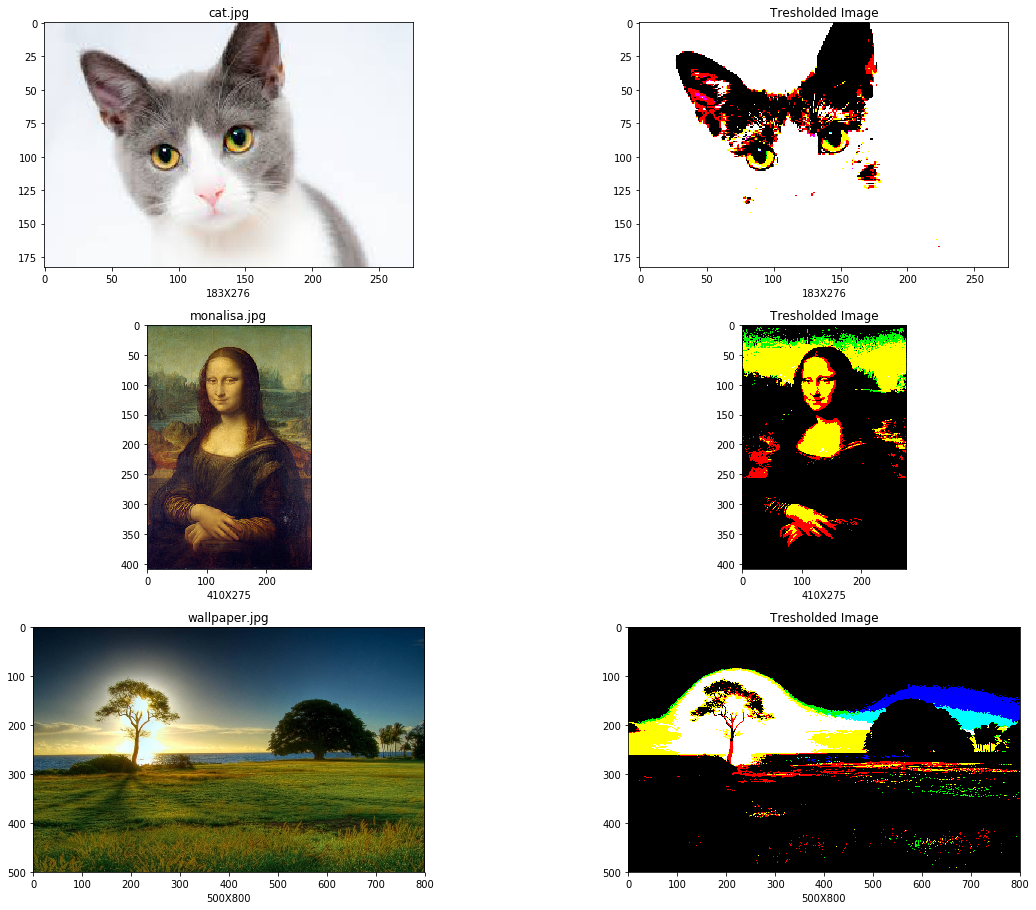

In [79]:
#Probar la función threshold_image Function con diferentes imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_C/'):
    #Obtener imágenes
    img = cv2.cvtColor(cv2.imread(os.path.join('Images_C/',filename),cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    thrimg=np.zeros(img.shape)
    #Graficar imagenes con threshold.
    if img is not None:
        plot=plt.subplot(3,2,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img)
        i=i+1
        thrimg=threshold_image(img,128)
        plot=plt.subplot(3,2,i)
        plot.set_title('Tresholded Image')
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(thrimg)
        i=i+1
plt.tight_layout()
plt.show()

Al igual que con las imágenes en escala de grises, se utiliza la función threshold_image creada. En las imágenes en escala de grises, esta operación se realiza en un solo canal. Sin embargo, en las imágenes a color, se realiza en los 3 canales.

<b>6. </b>Write a function avg_intensity_threshold_image which takes an image as its only parameter and thresholds this image based on the images average intensity value. <b>Hint:</b> Simply write a new function that uses the two functions just written. <br /> <br />

## Solution:

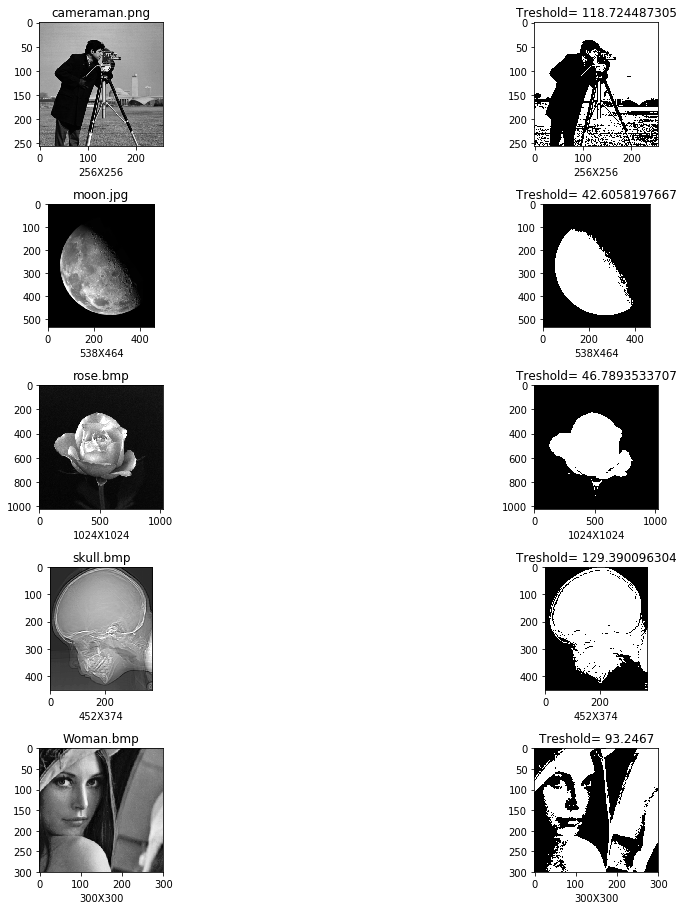

In [61]:
#Definir función avg_intensity_threshold_image.
def avg_intensity_threshold_image(Image):
    Threshold=average_intensity(Image)
    img=threshold_image(Image,Threshold)
    return img
#Probar la función con distintas imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_G/'):
    #Obtener imágenes.
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_GRAYSCALE)
    av_th_img=np.zeros(img.shape)
    Average=average_intensity(img)

    #Graficar imágenes.
    if img is not None:
        plot=plt.subplot(5,2,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img,cmap='gray')
        i=i+1
        av_th_img=avg_intensity_threshold_image(img)
        plot=plt.subplot(5,2,i)
        plot.set_title('Treshold= %s'% Average)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(av_th_img,cmap='gray')
        i=i+1
plt.tight_layout()
plt.show()

<h3>Descripción de la función avg_intensity_threshold_image:</h3>
<p style="text-align:justify">
La función avg_intensity_threshold_image implementada recibe como parámetro de entrada la imagen fuente que se va a procesar y tiene como salida una imagen procesada. El procesamiento que se realiza está dividido en dos partes. 
En primer lugar, se hace un llamado a la función "average_intensity" previamente definida con el objetivo de calcular el nivel de intensidad promedio de la imagen ingresada y así llamar a la función threshold_image donde sus parametros de entrada corresponderán en este caso a la imagen y al valor de intensidad promedio calculado. Por tanto, la salida será una imagen cuyo valor mínimo de un pixel corresponde a un valor mayor o igual al de threshold. 
Teniendo en cuenta el inconveniente presentado para las imágenes a color, no se implementó la función en ellas.
</p>

<b>7. </b>Write a function which subsamples a grayscale image of size 512x512 by factors of 2, i.e., 256, 128, 64 and display your results. There are multiple ways to do this as discussed in the textbook. You may simply sub-sample, average, etc.  Describe which you used and why.

<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/rose.bmp" height="256" width="256">
<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/rose.bmp" height="128" width="128">
<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/rose.bmp" height="64" width="64">
<img style="float: left; margin: 0px 0px 15px 15px;" src="Images_G/rose.bmp" height="32" width="32">

## Solution:

Para imágenes en escala de grises.

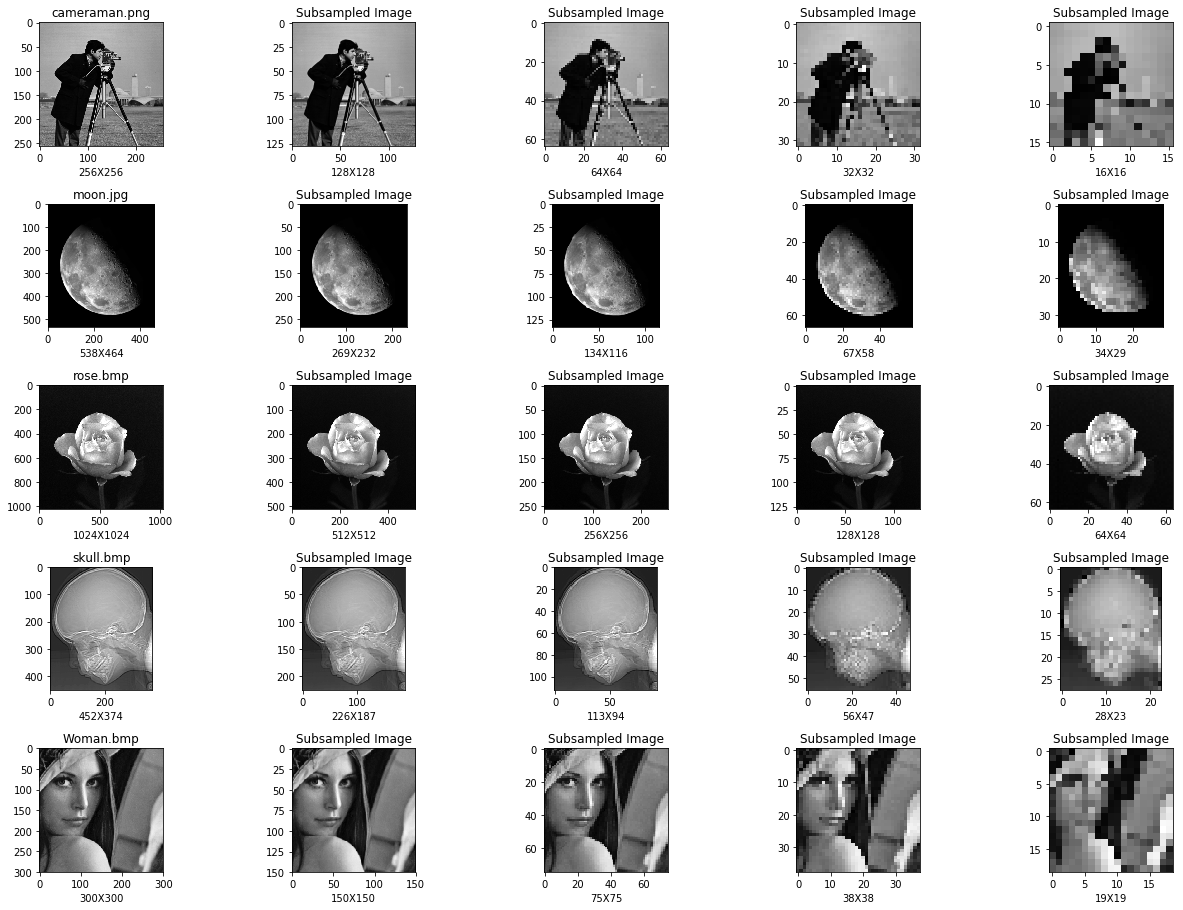

In [80]:
#Definir la función SubSample 
def SubSample(Image,factor):
    SmallerImage=cv2.resize(Image, (0,0), fx=1/(2**factor), fy=1/(2**factor)) 
    return SmallerImage
#Probar la función con diferentes imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_G/'):
    #Reading Images
    img = cv2.imread(os.path.join('Images_G/',filename),cv2.IMREAD_GRAYSCALE)
    SubSampleImg=np.zeros(img.shape)
    #Plotting SubSample Images
    if img is not None:
        plot=plt.subplot(5,5,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img,cmap='gray')
        i=i+1
        for j in range(1,5):
            SubSampleImg=SubSample(img,j)
            plot=plt.subplot(5,5,i)
            plot.set_title('Subsampled Image')
            plot.set_xlabel('%sX%s' % (SubSampleImg.shape[0],SubSampleImg.shape[1]))
            plt.imshow(SubSampleImg,cmap='gray')
            i=i+1
plt.tight_layout()
plt.show()


<h3>Descripción de la función SubSample:</h3>
<p style="text-align:justify">
La función SubSample desarrollada en este inciso toma como parámetro de entrada la imagen fuente que se va a procesar y el factor de reducción, tiene como salida la imagen procesada. Con la función RESIZE() de OPENCV se toman como parámetros de entrada, la imagen original y los factores de escala tanto vertical como horizontal, con los cuales se hará la interpolación para disminuir el número de pixeles. Reduciendo por cada factor, el tamaño a la mitad, se obtiene una serie de imágenes escaladas.
<h3>Descripción de la solución:</h3>
<p style="text-align:justify">
Con el fin de desarrollar este inciso fue necesario utilizar varias de las función de la librería OPENCV previamente descritas. </p> 


En el caso de imágenes a color.

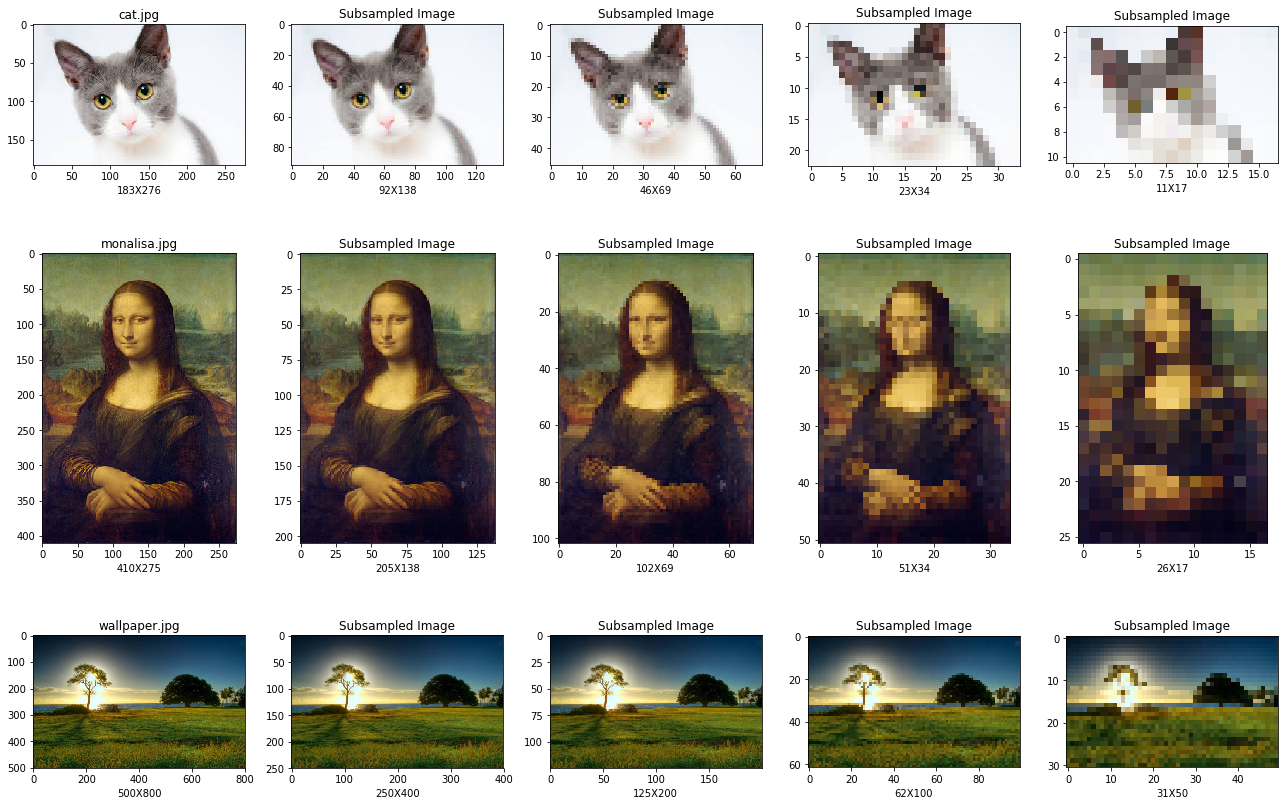

In [68]:
#Probar la función con diferentes imágenes.
i=1
plt.figure(figsize=(12*1.5,8.5*1.5));
for filename in os.listdir('Images_C/'):
    #Reading Images
    img = cv2.cvtColor(cv2.imread(os.path.join('Images_C/',filename),cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    SubSampleImg=np.zeros(img.shape)
    #Plotting SubSample Images
    if img is not None:
        plot=plt.subplot(3,5,i)
        plot.set_title(filename)
        plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
        plt.imshow(img)
        i=i+1
        for j in range(1,5):
            SubSampleImg=SubSample(img,j)
            plot=plt.subplot(3,5,i)
            plot.set_title('Subsampled Image')
            plot.set_xlabel('%sX%s' % (SubSampleImg.shape[0],SubSampleImg.shape[1]))
            plt.imshow(SubSampleImg)
            i=i+1
plt.tight_layout()
plt.show()


Para este tipo de imágenes se utilizó la misma función creada en el inciso. Cabe destacar que la función realiza la interpolación para cada uno de los canales de la imagen, a diferencia de las imágenes en escala de grises, donde solo se utiliza un canal.

<b>8. </b>Keeping your original image resolution reduce the number of gray levels in your image from 256 to 2 in powers of 2. Display your results.

<img style="float: left; margin: 0px 0px 15px 15px;" src="skull.bmp" height="200" width=200>

## Solution:

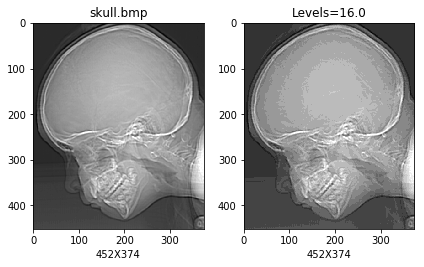

In [77]:
#Define LevelReducer function
def LevelReducer(Image,factor):
    Levels=256/2**factor
    (row,col)=Image.shape
    Image2=np.zeros(Image.shape)
    for i in range(0,row):
        for j in range(0,col):
            Image[i,j]=Image[i,j]/(2**factor)
    Image2=Image/np.max(Image)*255
    return Image2 
#Testing LevelReducer Function with skull.bmp
img = cv2.imread(os.path.join('Images_G/','skull.bmp'),cv2.IMREAD_GRAYSCALE)
LvlRedImg=np.zeros(img.shape)
img2=np.zeros(img.shape)
plot=plt.subplot(1,2,1)
plot.set_title('skull.bmp')
plot.set_xlabel('%sX%s' % (img.shape[0],img.shape[1]))
plt.imshow(img,cmap='gray')
factor=4
Levels=256/(2**factor)
LvlRedImg=LevelReducer(img,factor)
plot=plt.subplot(1,2,2)
plot.set_title('Levels=%s' % Levels)
plot.set_xlabel('%sX%s' % (LvlRedImg.shape[0],LvlRedImg.shape[1]))
plt.imshow(LvlRedImg,cmap='gray')
plt.tight_layout()
plt.show()

<h3>Descripción de la función LevelReducer:</h3>
<p style="text-align:justify">
La función LevelReduce() desarrollada en este inciso recibe dos parámetros: La imagen y el factor de reducción que se utilizará, es decir, el numero de niveles de gris a los que va a reducirse. Esta función retorna la imagen modificada con el numero de niveles de intensidad de gris.</p>
<h3>Descripción de la solución:</h3>
<p style="text-align:justify">
La función desarrollada en este inciso realiza los siguientes procesos: Primero se calcula el tamaño de la imágen original, se crea una matriz del mismo tamaño llena de ceros, en la cual se guardarán los pixeles de la imagen modificada. Luego a cada pixel de la imagen original se reducen los niveles de intensidad en potencias de 2, teniendo en cuenta el factor escogido </p>
